# Tutorial 1: Vectors

**Week 0, Day 3: Linear Algebra**

**By Neuromatch Academy**

__Content creators:__ Ella Batty

__Content reviewers:__ Keith van Antwerp, Pooya Pakarian, Anoop Kulkarni

__Production editors:__ Siddharth Suresh, Ella Batty

---
# Tutorial Objectives
*Estimated timing of tutorial: 1 hour, 25 minutes*

During today, we will learn the basics of linear algebra, focusing on the topics that underlie the material on future days in the NMA Computational Neuroscience course. In this tutorial, we focus on vectors: their definition, their properties & operations, and how we can use them to define our coordinate system.

By the end of this tutorial, you will:
* Be able to provide an example of how linear algebra is used in computational neuroscience
* Be able to describe vectors, their properties (dimensionality/length), and their operations (scalar multiplication, vector addition, dot product) geometrically
* Be able to determine and explain the number of basis vectors necessary for a given vector space


In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

# Figure settings

In [3]:
import ipywidgets as widgets  # interactive display
from ipywidgets import fixed
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")

# Plotting functions

In [8]:
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d


def visualize_vectors(v, v_unit):
  """ Plots a 2D vector and the corresponding unit vector

  Args:
    v (ndarray): array of size (2,) with the vector coordinates
    v_unit (ndarray): array of size (2, ) with the unit vector coordinates

  """
  fig, ax = plt.subplots()

  # Set up plot aesthetics
  ax.spines['top'].set_color('none')
  ax.spines['bottom'].set_position('zero')
  ax.spines['left'].set_position('zero')
  ax.spines['right'].set_color('none')
  ax.set(xlim = [-6, 6], ylim = [-6, 6])
  ax.grid(True, alpha=.4, linewidth=1, zorder=0)

  # Plot vectors
  v_arr = ax.arrow(0, 0, v[0], v[1], width=0.08, color='#648FFF',
                   length_includes_head=True, zorder=2);
  v_unit_arr = ax.arrow(0, 0, v_unit[0], v_unit[1], width=0.08,
                        color='#DC267F',
                        length_includes_head=True, zorder=3);
  ax.set(xlim = [-4, 4], ylim = [-4, 4]);

  # Add legend
  leg = ax.legend([v_arr, v_unit_arr],
                  [r"Vector $\mathbf{v}$",
                   r"Normalized vector $\tilde{\mathbf{v}}$"],
                  handlelength=0, fontsize=20, loc='upper left')

  leg.get_texts()[0].set_color('#648FFF')
  leg.get_texts()[1].set_color('#DC267F')

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
      FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
      self._verts3d = xs, ys, zs

    def draw(self, renderer):
      xs3d, ys3d, zs3d = self._verts3d
      xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
      self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
      FancyArrowPatch.draw(self, renderer)

    def do_3d_projection(self, renderer=None):
      xs3d, ys3d, zs3d = self._verts3d
      xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
      self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))

### Coding Exercise 1.1: Normalizing vectors

In this exercise, you will first create the below vector, $\mathbf{v}$, using a numpy array. You will then implement a function, `normalize_vector`, that outputs a normalized version of the input vector (by dividing each component by the vector length).  You will then visualize both the original vector and the unit vector.

First think: how do you think the normalized unit vector will compare to the original vector in terms of direction and length?


\begin{equation}
\mathbf{v} =
\begin{bmatrix}
4 \\
1
\end{bmatrix}
\end{equation}

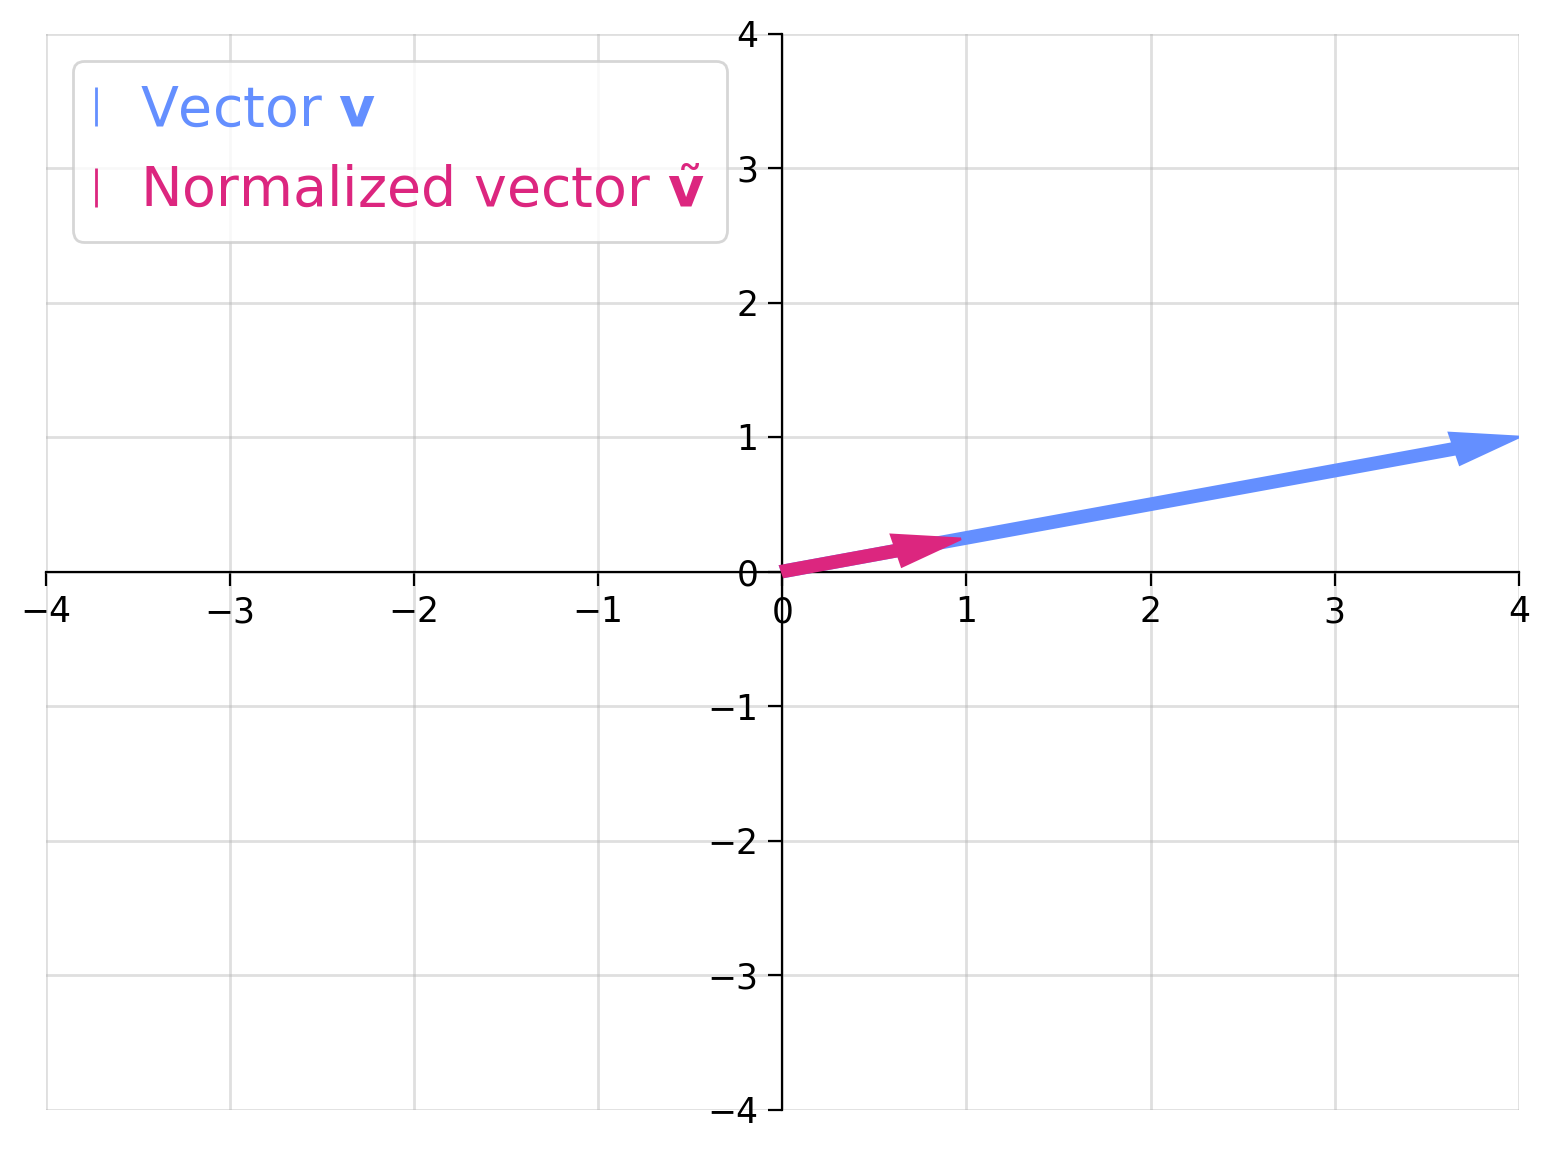

In [9]:
def normalize_vector(input_vector):
  """ Normalizes a vector to length 1

  Inputs:
    input_vector (ndarray): array of shape (n_dim, ) where n_dim is the
        dimensionality of the vector

  Outputs:
    (ndarray): normalized vector of length 1
  """

  #################################################################################
  ## TODO for students: complete normalize_vector function ##
  # Fill out function and remove
  # raise NotImplementedError("Student exercise: complete normalize_vector function")
  #################################################################################

  # Compute vector length (use np.linalg.norm)
  vector_length = np.linalg.norm(input_vector)

  # Create normalized vector
  normalized_vector = input_vector / vector_length

  return normalized_vector

# Create vector v from above (use np.array)
v = np.array([4,1])

# Call the function
v_unit = normalize_vector(v)

# Visualize the vectors
visualize_vectors(v, v_unit)

Had to do some debugging in the Plotting Function since Matplotlib no longer support `legendHandles`